In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import calendar
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [96]:
df = pd.read_csv('/Users/biraj/Desktop/Github/flight-prediction-api/datasets/Flights_2021/final_dataset-add.csv')

In [97]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operating_Airline,OriginAirportID,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_direction_100m
0,0,2021,1,1,5,2,2021-01-05,DL,9E,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
1,1,2021,1,1,5,2,2021-01-05,AA,AA,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
2,2,2021,1,1,5,2,2021-01-05,DL,DL,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
3,3,2021,1,1,5,2,2021-01-05,NK,NK,11298,...,3.681,0.0,0.0,0.0,0.0,1000.82007,0.0,8.496305,126.384445,127.568665
4,4,2021,1,1,6,3,2021-01-06,DL,9E,11298,...,13.781,1.4,1.4,0.0,61.0,991.41290,100.0,15.463244,192.094740,196.389620


In [98]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Marketing_Airline_Network', 'Operating_Airline ',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'CombinedDateTime', 'ScaledCRSDepTime', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snowfall', 'weather_code', 'surface_pressure', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'wind_direction_100m'],
      dtype='object')

In [99]:
df['ArrDel15'].value_counts()

0.0    443410
1.0     93572
Name: ArrDel15, dtype: int64

In [100]:
df_arr_delay = df[df['ArrDel15']==1.0]

In [101]:
df_arr_delay.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operating_Airline,OriginAirportID,...,dew_point_2m,precipitation,rain,snowfall,weather_code,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,wind_direction_100m
19,19,2021,1,1,20,3,2021-01-20,AA,AA,11298,...,3.8810,0.9,0.9,0.00,53.0,1006.0034,90.90001,4.680000,112.61991,115.016870
65,65,2021,1,1,26,2,2021-01-26,DL,9E,11433,...,-2.7955,1.2,0.0,0.84,75.0,982.5220,100.00000,16.808570,46.73567,49.635548
90,90,2021,1,1,3,7,2021-01-03,DL,9E,11433,...,-0.2455,0.2,0.0,0.14,71.0,990.3015,100.00000,9.605998,77.00539,84.173760
96,96,2021,1,1,3,7,2021-01-03,DL,DL,11433,...,-0.2455,0.2,0.0,0.14,71.0,990.3015,100.00000,9.605998,77.00539,84.173760
97,97,2021,1,1,3,7,2021-01-03,DL,DL,11433,...,-0.2455,0.2,0.0,0.14,71.0,990.3015,100.00000,9.605998,77.00539,84.173760


In [102]:
average_delay

CombinedDateTime
2021-01-01    11.609589
2021-01-02    10.223642
2021-01-03    10.180389
2021-01-04     7.855151
2021-01-05     4.223070
                ...    
2021-12-27    37.451613
2021-12-28    37.798337
2021-12-29    29.502055
2021-12-30    30.869625
2021-12-31    18.662712
Name: DepDelayMinutes, Length: 365, dtype: float64

20:38:59 - cmdstanpy - INFO - Chain [1] start processing
20:38:59 - cmdstanpy - INFO - Chain [1] done processing


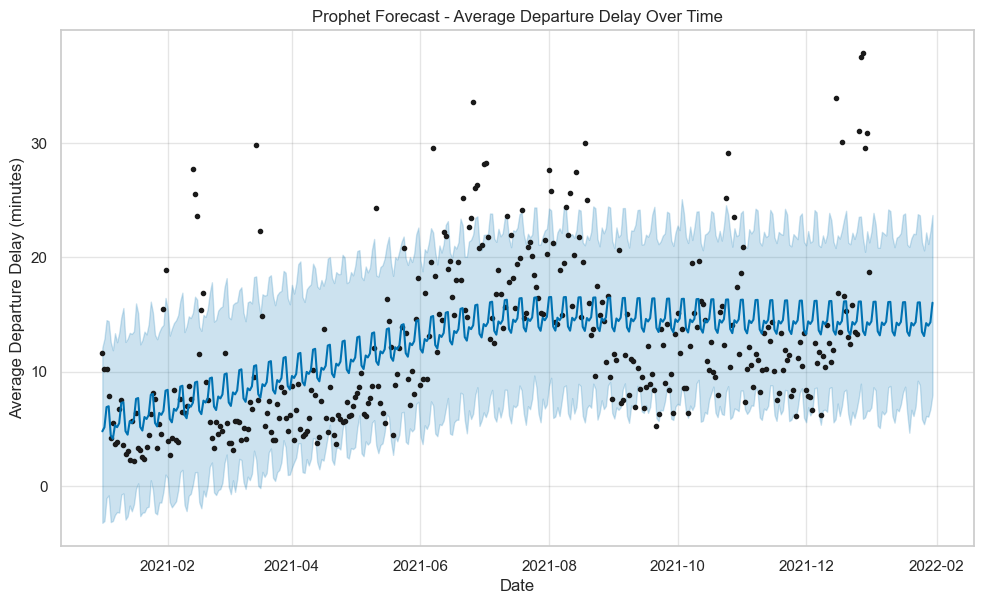

In [113]:
df['CombinedDateTime'] = pd.to_datetime(df['CombinedDateTime'])

prophet_data = df.groupby(df['CombinedDateTime'].dt.date)['DepDelayMinutes'].mean().reset_index()
prophet_data.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_data)

future = model.make_future_dataframe(periods=30) 

forecast = model.predict(future)

fig = model.plot(forecast, xlabel='Date', ylabel='Average Departure Delay (minutes)')
plt.title('Prophet Forecast - Average Departure Delay Over Time')
plt.show()

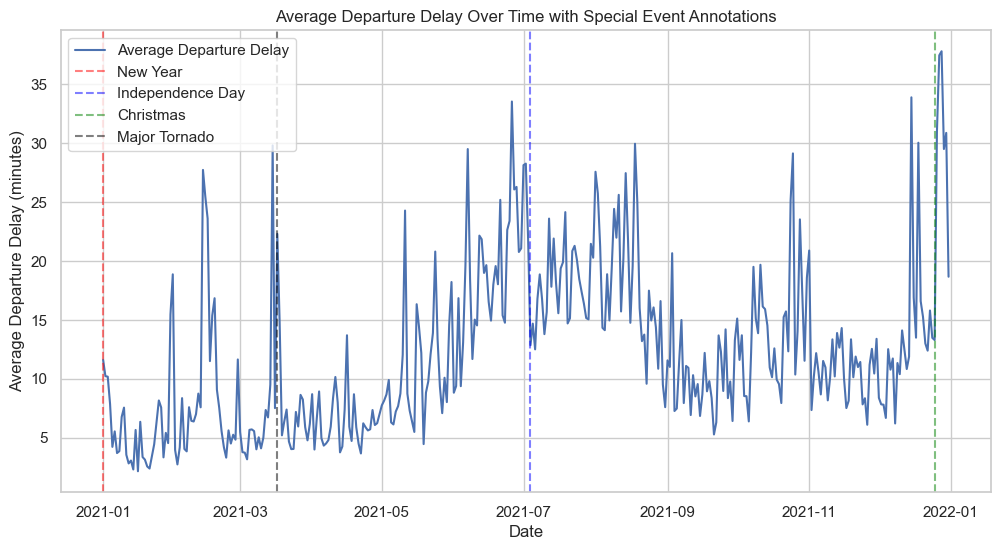

In [105]:
df['CombinedDateTime'] = pd.to_datetime(df['CombinedDateTime'])

time_series = df.groupby(df['CombinedDateTime'].dt.date)['DepDelayMinutes'].mean().reset_index()
time_series.columns = ['ds', 'y']

special_events = [
    {'date': '2021-01-01', 'label': 'New Year', 'color': 'red'},
    {'date': '2021-07-04', 'label': 'Independence Day', 'color': 'blue'},
    {'date': '2021-12-25', 'label': 'Christmas', 'color': 'green'},
    {'date': '2021-03-17', 'label': 'Major Tornado', 'color': 'black'}
]

plt.figure(figsize=(12, 6))
plt.plot(time_series['ds'], time_series['y'], label='Average Departure Delay')

for event in special_events:
    plt.axvline(pd.to_datetime(event['date']), color=event['color'], linestyle='--', alpha=0.5, label=event['label'])


plt.title('Average Departure Delay Over Time with Special Event Annotations')
plt.xlabel('Date')
plt.ylabel('Average Departure Delay (minutes)')
plt.legend()
plt.show()

<Figure size 1200x400 with 0 Axes>

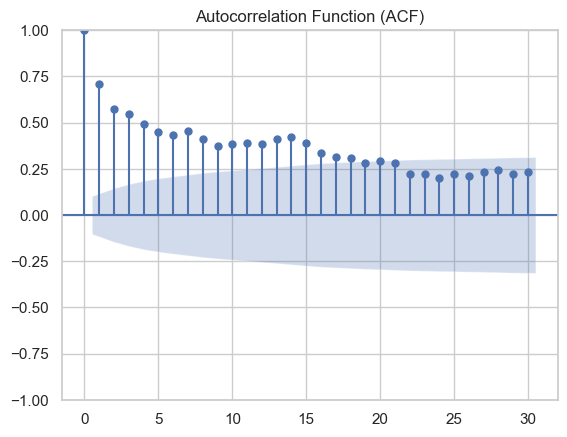

<Figure size 1200x400 with 0 Axes>

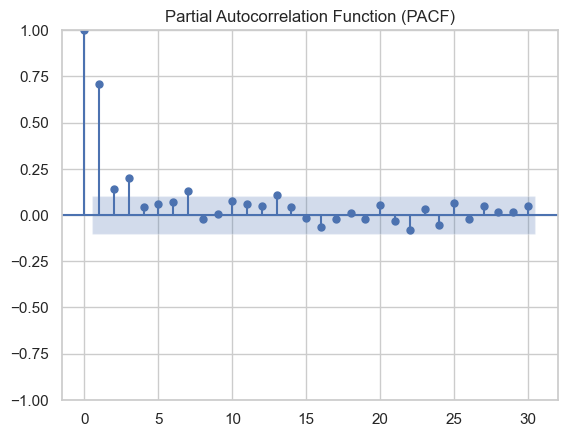

In [106]:



df['CombinedDateTime'] = pd.to_datetime(df['CombinedDateTime'])

time_series = df.groupby(df['CombinedDateTime'].dt.date)['DepDelayMinutes'].mean().reset_index()
time_series.columns = ['ds', 'y']

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(time_series['y'], lags=30, title='Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(time_series['y'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.show()


In [107]:
unique_pairs = df[['Origin', 'Dest']]
pair_counts = unique_pairs.groupby(['Origin', 'Dest']).size().reset_index(name='PairCount')
pair_counts_sorted = pair_counts.sort_values(by='PairCount', ascending=False)
print(pair_counts_sorted)

    Origin Dest  PairCount
87     LAX  SFO       9519
156    SFO  LAX       9503
34     DEN  PHX       7285
126    PHX  DEN       7229
130    PHX  LAX       7046
..     ...  ...        ...
90     MDW  CLT        353
157    SFO  MDW        344
98     MDW  SFO        336
150    SFO  BWI        108
10     BWI  SFO        108

[176 rows x 3 columns]


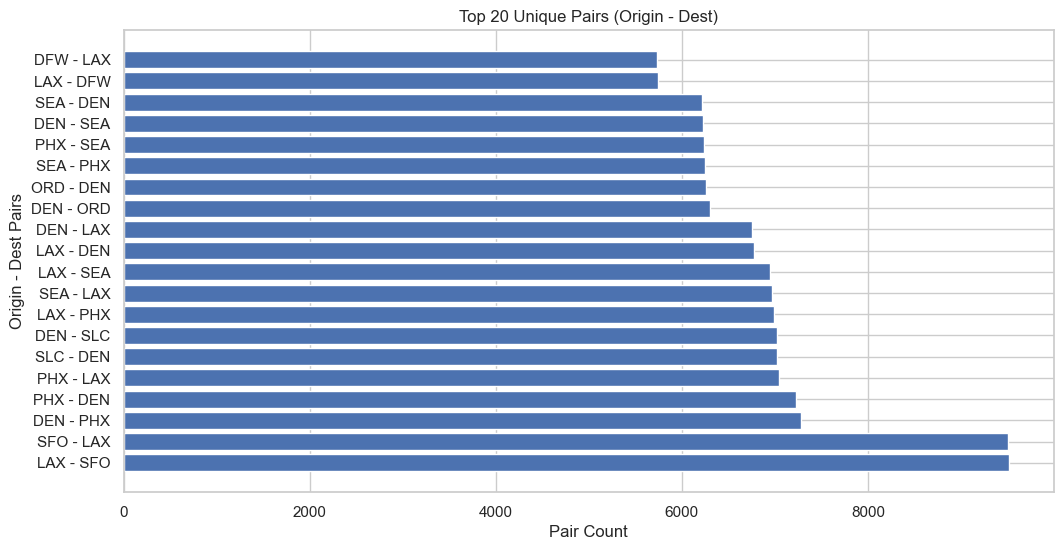

In [108]:
unique_pairs = df[['Origin', 'Dest']]

pair_counts = unique_pairs.groupby(['Origin', 'Dest']).size().reset_index(name='PairCount')
pair_counts_sorted = pair_counts.sort_values(by='PairCount', ascending=False)

top_20_pairs = pair_counts_sorted.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_pairs.apply(lambda x: f"{x['Origin']} - {x['Dest']}", axis=1), top_20_pairs['PairCount'])
plt.xlabel('Pair Count')
plt.ylabel('Origin - Dest Pairs')
plt.title('Top 20 Unique Pairs (Origin - Dest)')
plt.show()


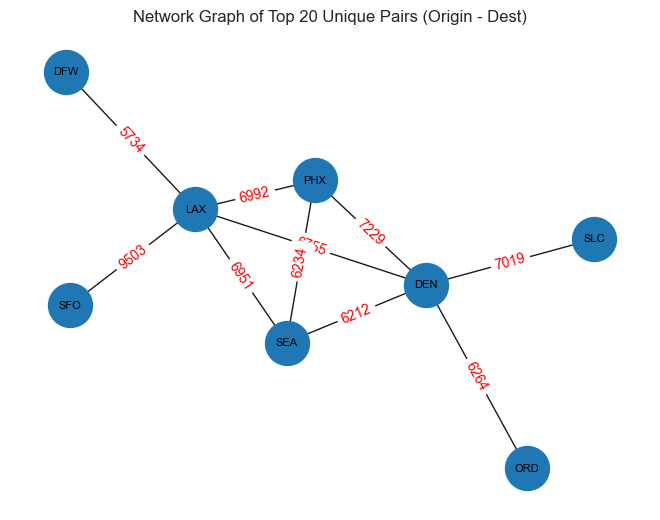

In [109]:

import networkx as nx
unique_pairs = df[['Origin', 'Dest']]

# Count the number of occurrences for each unique pair
pair_counts = unique_pairs.groupby(['Origin', 'Dest']).size().reset_index(name='PairCount')
pair_counts_sorted = pair_counts.sort_values(by='PairCount', ascending=False)

#select the top 20 pairs
top_20_pairs = pair_counts_sorted.head(20)
G = nx.Graph()


for index, row in top_20_pairs.iterrows():
    G.add_edge(row['Origin'], row['Dest'], weight=row['PairCount'])


pos = nx.spring_layout(G, seed=42)  
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Network Graph of Top 20 Unique Pairs (Origin - Dest)')
plt.show()


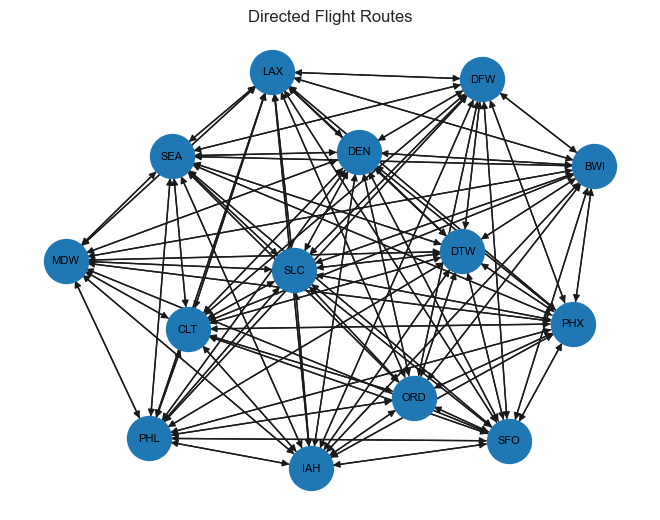

In [110]:
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row['Origin'], row['Dest'])

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', arrowsize=10)

plt.title('Directed Flight Routes')
plt.show()

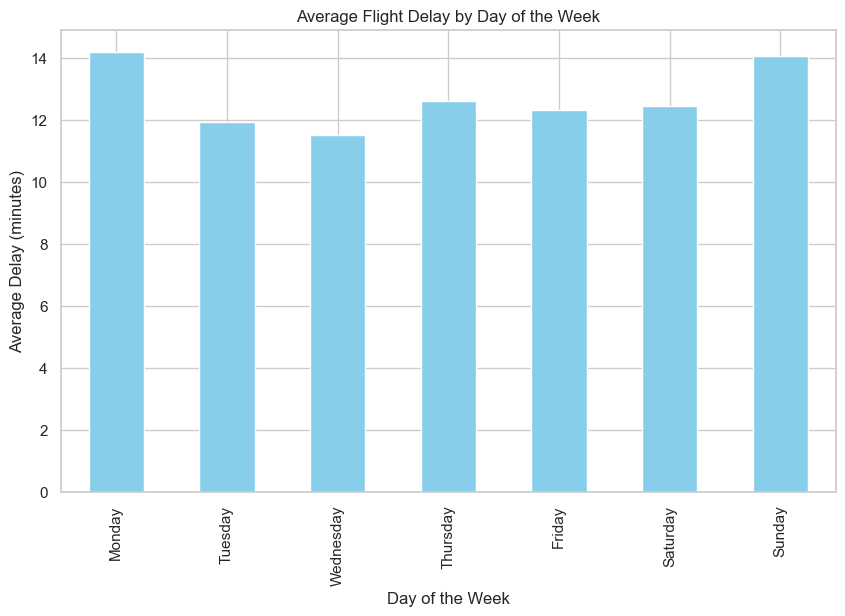

In [111]:

df['CombinedDateTime'] = pd.to_datetime(df['CombinedDateTime'])

df['DayOfWeek'] = df['CombinedDateTime'].dt.day_name()

avg_delay_by_day = df.groupby('DayOfWeek')['DepDelayMinutes'].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_delay_by_day = avg_delay_by_day.reindex(days_order)


plt.figure(figsize=(10, 6))
avg_delay_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Flight Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.show()


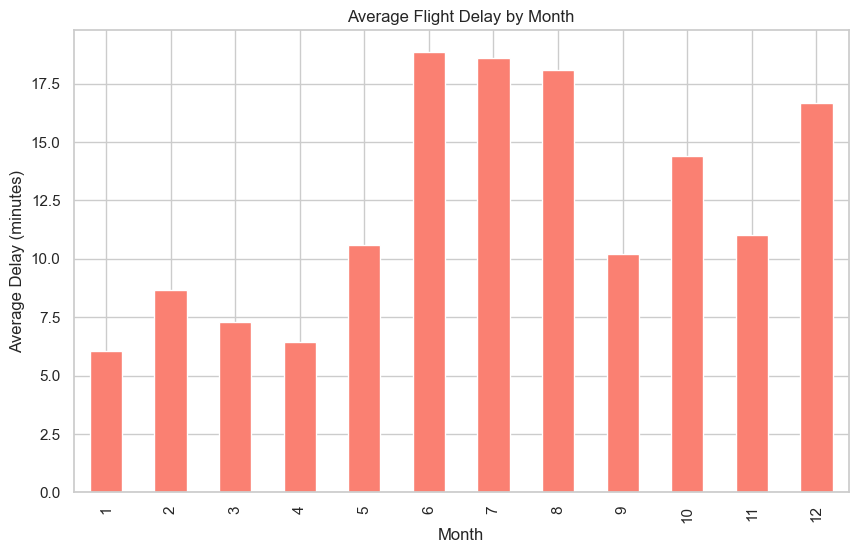

In [112]:
avg_delay_by_month = df.groupby('Month')['DepDelayMinutes'].mean()
plt.figure(figsize=(10, 6))
avg_delay_by_month.plot(kind='bar', color='salmon')
plt.title('Average Flight Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.show()
